Importando bibliotecas


In [767]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 

Lendo arquivos e concatenando eles


In [768]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df = pd.concat([df_train, df_test])

In [769]:
df_test.shape

(418, 11)

In [770]:
df_train.shape

(891, 12)

In [771]:
df.shape

(1309, 12)

In [772]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Análise exploratória de dados

Primeiramente verificar a importância da variável cabine 

In [773]:
a = pd.DataFrame()

a['cabin'] = df_train['Cabin'].astype(str).str[0]

In [829]:
total_cabins = [15,47,59, 33,32,13,4]
survived = [7,35,35,25,24,8,2]
cabins = ['A','B','C','D','E','F','G']

percentages = []

for i in range(7):
  percentages.append(100*survived[i]/total_cabins[i])

percentages


[46.666666666666664,
 74.46808510638297,
 59.32203389830509,
 75.75757575757575,
 75.0,
 61.53846153846154,
 50.0]

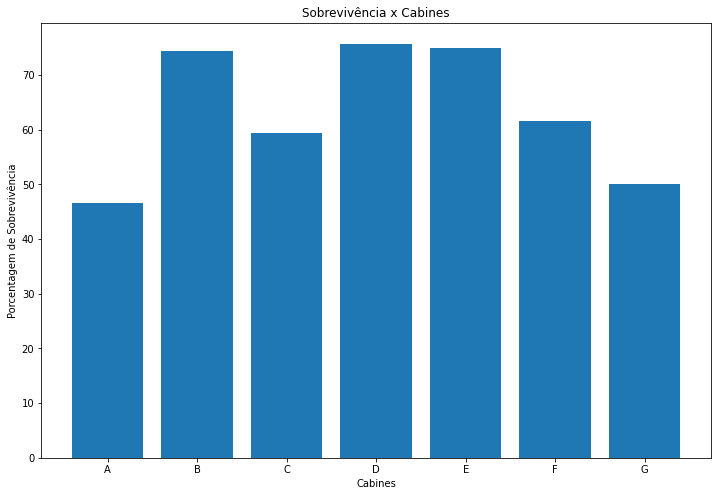

In [777]:
plt.figure(figsize=(12,8))
plt.bar(cabins, percentages)
plt.xlabel('Cabines')
plt.ylabel('Porcentagem de Sobrevivência')
plt.title('Sobrevivência x Cabines')
plt.show()

Percebe-se que a cabine é um bom indício de sobrevivência, haja vista que as cabines como B D E possuem grandes porcentagens de sobrevivência.


Agrupando as cabines com porcentagens similares


In [778]:
df['Cabins'] = df['Cabin'].astype(str).str[0]
df['Cabins'] = df['Cabins'].replace(['A', 'B', 'C'], 'ABC')
df['Cabins'] = df['Cabins'].replace(['D', 'E'], 'DE')
df['Cabins'] = df['Cabins'].replace(['F', 'G'], 'FG')

Organizar de acordo com o Titulo de cada indivíduo


In [779]:
df_train['surname'] = df_train['Name'].apply(lambda x: x.split(',')[1]) 
df_train['surname'] = df_train['surname'].apply(lambda x: x.split('.')[0].strip()) 
 
df_train['surname'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: surname, dtype: int64

Dicionário para agrupar certos nomes


In [780]:
replace = {
  'Capt' : 'Outros',    
  'Col' : 'Outros',
  'Don' : 'Outros',
  'Jonkheer' : 'Outros',
  'Lady' : 'Outros',  
  'Major' : 'Outros',
  'Mlle' : 'Outros',
  'Mme' : 'Outros',
  'Ms' : 'Miss/Mrs/Ms',
  'Rev' : 'Outros',
  'Sir' : 'Outros',
  'the Countess' : 'Outros',
  'Dona' : 'Outros',
  'Dr' : 'Outros',
  'Miss' : 'Miss/Mrs/Ms',
  'Mrs' : 'Miss/Mrs/Ms'
}

In [781]:
df_train['surname'] = df_train['surname'].replace(replace)
df_train['surname'].value_counts()

Mr             517
Miss/Mrs/Ms    308
Master          40
Outros          26
Name: surname, dtype: int64

In [782]:
Surnames = df_train['surname'].value_counts().index.tolist()
Surnames_count = df_train['surname'].value_counts().tolist()
Surnames_count 

[517, 308, 40, 26]

In [783]:
survival_rate = []
for i in range(4):
  soma = df_train.loc[df_train['surname'] == Surnames[i], 'Survived'].sum()
  survival_rate.append(100*soma / Surnames_count[i])

print(survival_rate)

[15.667311411992262, 73.7012987012987, 57.5, 42.30769230769231]


Percebe-se a importância do título de cada indivíduo para a chance de sobrevivênci

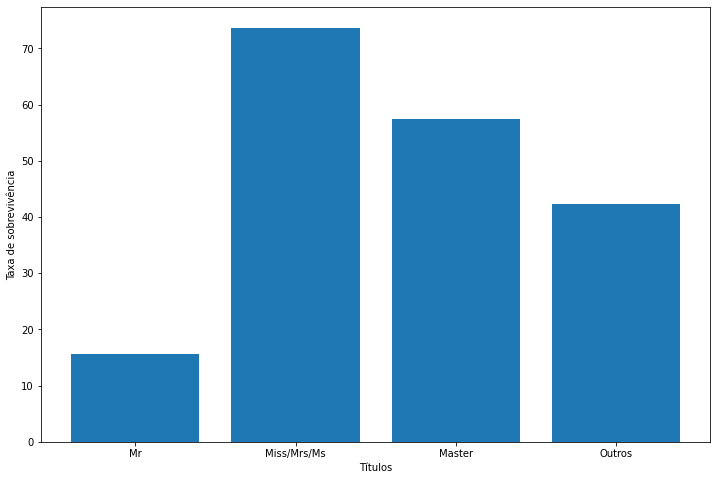

In [784]:
plt.figure(figsize=(12,8))
plt.xlabel('Títulos')
plt.ylabel('Taxa de sobrevivência')
plt.bar(Surnames, survival_rate)
plt.show()

Fazendo as alterações no dataframe principal


In [785]:
df['surname'] = df['Name'].apply(lambda x: x.split(',')[1]) 
df['surname'] = df['surname'].apply(lambda x: x.split('.')[0].strip()) 

In [786]:
def is_married(str):
  if str == 'Mrs':
    return 'yes'
  return 'no'


df['Is_married'] = df['surname']
df['Is_married'] = df['Is_married'].apply(lambda x: is_married(x)) 

In [787]:
df['surname'] = df['surname'].replace(replace)

Adicionando o tamanho da familia de cada indivíduo.

In [788]:
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch'] + 1

In [789]:
family_map = {1: 'Sozinho', 2: 'Pequeno', 3: 'Pequeno', 4: 'Pequeno', 5: 'Medio', 6: 'Medio', 7: 'Grande', 8: 'Grande', 11: 'Grande'}
df_train['Family_Size_Grouped'] = df_train['Family_Size'].map(family_map)

In [790]:
familias = df_train['Family_Size_Grouped'].value_counts().keys().tolist()
familias_sobrevivencia = df_train['Family_Size_Grouped'].value_counts().tolist()
familias_sobrevivencia

[537, 292, 37, 25]

In [791]:
survival_rate = []
for i in range(4):
  soma = df_train.loc[df_train['Family_Size_Grouped'] == familias[i], 'Survived'].sum()
  survival_rate.append(100*soma / familias_sobrevivencia[i])

print(survival_rate)

[30.353817504655492, 57.87671232876713, 16.216216216216218, 16.0]


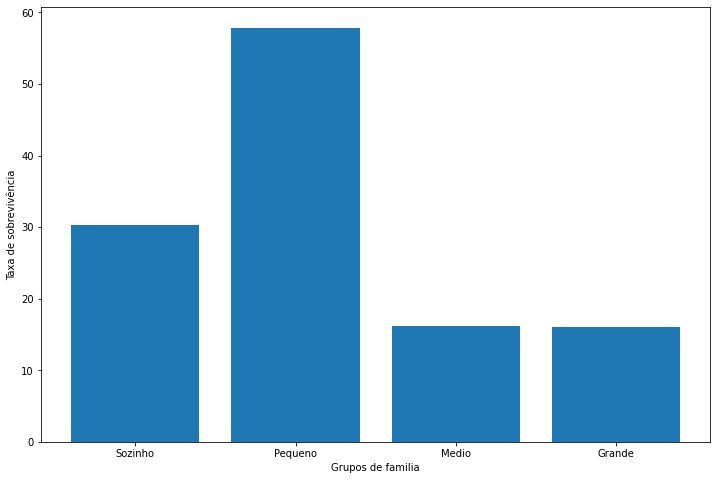

In [792]:
plt.figure(figsize=(12,8))
plt.xlabel('Grupos de familia')
plt.ylabel('Taxa de sobrevivência')

plt.bar(familias, survival_rate)
plt.show()

Atualizando no dataframe principal

In [793]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Family_Size_Grouped'] = df['Family_Size'].map(family_map)


Adicionando a quantidade de pessoas com o mesmo ticket

In [794]:
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

Tirando colunas desnecessárias

In [795]:
X = df.drop(['Name', 'Ticket', 'Cabin', 'Survived'], axis=1)


In [796]:
X.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabins,surname,Is_married,Family_Size,Family_Size_Grouped,Ticket_Frequency
0,1,3,male,22.0,1,0,7.2500,S,n,Mr,no,2,Pequeno,1
1,2,1,female,38.0,1,0,71.2833,C,ABC,Miss/Mrs/Ms,yes,2,Pequeno,2
2,3,3,female,26.0,0,0,7.9250,S,n,Miss/Mrs/Ms,no,1,Sozinho,1
3,4,1,female,35.0,1,0,53.1000,S,ABC,Miss/Mrs/Ms,yes,2,Pequeno,2
4,5,3,male,35.0,0,0,8.0500,S,n,Mr,no,1,Sozinho,1


In [797]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1309 non-null   int64  
 1   Pclass               1309 non-null   int64  
 2   Sex                  1309 non-null   object 
 3   Age                  1046 non-null   float64
 4   SibSp                1309 non-null   int64  
 5   Parch                1309 non-null   int64  
 6   Fare                 1308 non-null   float64
 7   Embarked             1307 non-null   object 
 8   Cabins               1309 non-null   object 
 9   surname              1309 non-null   object 
 10  Is_married           1309 non-null   object 
 11  Family_Size          1309 non-null   int64  
 12  Family_Size_Grouped  1309 non-null   object 
 13  Ticket_Frequency     1309 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 153.4+ KB


Transformando as variáveis objeto para numéricas

In [798]:
l1 = LabelEncoder()

In [799]:
X['Sex'] = l1.fit_transform(X['Sex'])
X['Embarked'] = l1.fit_transform(X['Embarked'])
X['Cabins'] = l1.fit_transform(X['Cabins'])
X['surname'] = l1.fit_transform(X['surname'])
X['Is_married'] = l1.fit_transform(X['Is_married'])
X['Family_Size_Grouped'] = l1.fit_transform(X['Family_Size_Grouped'])

In [800]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabins,surname,Is_married,Family_Size,Family_Size_Grouped,Ticket_Frequency
0,1,3,1,22.0,1,0,7.2500,2,4,2,0,2,2,1
1,2,1,0,38.0,1,0,71.2833,0,0,1,1,2,2,2
2,3,3,0,26.0,0,0,7.9250,2,4,1,0,1,3,1
3,4,1,0,35.0,1,0,53.1000,2,0,1,1,2,2,2
4,5,3,1,35.0,0,0,8.0500,2,4,2,0,1,3,1


In [801]:
X.duplicated().sum()

0

In [802]:
X.isnull().sum()

PassengerId              0
Pclass                   0
Sex                      0
Age                    263
SibSp                    0
Parch                    0
Fare                     1
Embarked                 0
Cabins                   0
surname                  0
Is_married               0
Family_Size              0
Family_Size_Grouped      0
Ticket_Frequency         0
dtype: int64

Preenchendo as linhas Na com a media

In [803]:
X['Age'].fillna(df['Age'].mean(), inplace=True)
X['Fare'].fillna(X['Fare'].mean(), inplace=True)

In [804]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabins,surname,Is_married,Family_Size,Family_Size_Grouped,Ticket_Frequency
0,1,3,1,22.0,1,0,7.2500,2,4,2,0,2,2,1
1,2,1,0,38.0,1,0,71.2833,0,0,1,1,2,2,2
2,3,3,0,26.0,0,0,7.9250,2,4,1,0,1,3,1
3,4,1,0,35.0,1,0,53.1000,2,0,1,1,2,2,2
4,5,3,1,35.0,0,0,8.0500,2,4,2,0,1,3,1


In [805]:
X.isnull().sum()

PassengerId            0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Cabins                 0
surname                0
Is_married             0
Family_Size            0
Family_Size_Grouped    0
Ticket_Frequency       0
dtype: int64

In [806]:
Y = df_train['Survived']

Dividindo o df principal para treino e test

In [807]:
df_train = X.loc[X['PassengerId'] < 892]
df_test = X.loc[X['PassengerId'] >=892]

In [808]:
df_test.shape

(418, 14)

Usando o RandomForestClassifier para o metodo de classificação

In [809]:
from sklearn.ensemble import RandomForestClassifier

In [810]:
Classi = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           n_jobs=-1,
                                           verbose=1)

Classi.fit(df_train, Y)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    2.1s finished


RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=5,
                       min_samples_split=4, n_estimators=1100, n_jobs=-1,
                       oob_score=True, verbose=1)

In [812]:
train_pred = Classi.predict(df_train)
accuracy = accuracy_score(Y, train_pred)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s


0.8406285072951739


[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished


In [814]:
print(f'Acurácia: {accuracy*100}')

Acurácia: 84.0628507295174


In [815]:
preds = Classi.predict(df_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished


In [816]:
sub = pd.read_csv('gender_submission.csv')

In [817]:
sub['Survived'] = preds

In [818]:
from google.colab import files
sub.to_csv('output.csv', encoding = 'utf-8-sig', index=False) 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

O data frame de teste foi enviado ao kaggle e recebeu uma acurácia de 78,468 %, fazendo com que o modelo fique no top 12% da competição.